In [1]:
import sys
sys.path.append('..')
import awkward as awk
from heputl import logging as heplog
import matplotlib.pyplot as plt

In [13]:
import src.reader as read
import src.generator as gene
import src.selection as sele
import src.string_constants as stco
import src.util as util

In [6]:
ss = '_Nom_output.root/user.ltoffoli.37351503._000003.output.root'

In [8]:
'37305915._000003.output.root' in ss

False

In [11]:
logger = heplog.get_logger(__name__)

In [3]:
dsids = list(stco.ds_ids_bg.values())

In [4]:
feature_filter = ['jet_pt_lead','dsid','wt']
N=int(1e3)
samples_concat = None

In [5]:
for dsid in dsids:
    samples = read.read_samples_for_dsid(dsid,N=N)
    selected = sele.select_lightjets(samples)
    weights = util.compute_w_samples(selected, dsid)
    selected['dsid'] = dsid
    selected['wt'] = weights
    if samples_concat is None:
        samples_concat = selected[feature_filter]
    else:    
        samples_concat = awk.concatenate([samples_concat,selected[feature_filter]])

reading samples for dsid 410472 from /eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.410472.PhPy8EG_A14_ttbar_hdamp258p75_dil.D_FTAG2.e6348_s3681_r13144_p5981.GN2v01_Nom_output.root
reading samples for dsid 363356 from /eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.363356.Sherpa_221_NNPDF30NNLO_ZqqZll.D_FTAG2.e5525_s3681_r13144_p5981.GN2v01_Nom_output.root
reading samples for dsid 363358 from /eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.363358.Sherpa_221_NNPDF30NNLO_WqqZll.D_FTAG2.e5525_s3681_r13144_p5981.GN2v01_Nom_output.root
reading samples for dsid 364302 from /eos/atlas/atlascerngroupdisk/perf-flavtag/calib/negtag/Rel24_GN2v01/Ntuples_Nominal/mc20d/user.ltoffoli.mc20_13T.364302.Sherpa_222_NNPDF30NNLO_ggZllZqq.D_FTAG2.e6273_s3681_r13144_p5981.GN2v01_Nom_output.root


In [6]:
samples_concat

<Array [{jet_pt_lead: 4.89e+04, ...}, ...] type='211293 * {jet_pt_lead: flo...'>

In [7]:
ttb, zz, wz = util.split_into_ttbar_zz_wz(samples_concat)

In [8]:
dats = [ttb.jet_pt_lead, zz.jet_pt_lead, wz.jet_pt_lead]
weights = [ttb.wt, zz.wt, wz.wt]
labels = ['ttb', 'zz', 'wz']

In [9]:
ttb

<Array [{jet_pt_lead: 4.89e+04, ...}, ...] type='59776 * {jet_pt_lead: floa...'>

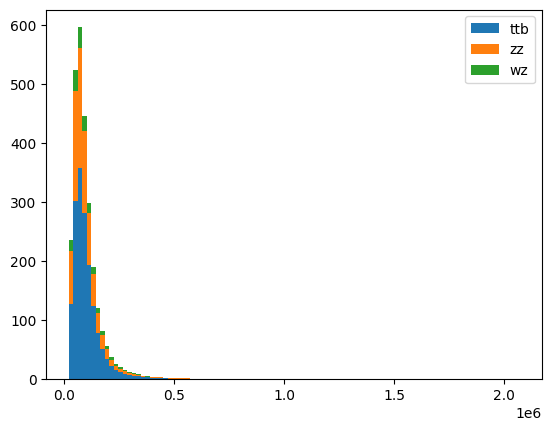

In [10]:
plt.figure()
_ = plt.hist(dats, weights=weights, stacked=True, label=labels, bins=100)
plt.legend()
plt.show()

# read data

In [14]:
N_batch = int(1e3)
N_total = int(1e4)
generator_ee = gene.sample_generator(stco.in_dir_data, N=N_batch, selection_fun=sele.select_lightjets, feature_names_in=stco.feature_names_dat)

samples_concat = None

for sample_batch in generator_ee:

    if samples_concat is None:
        samples_concat = sample_batch
    else:
        samples_concat = awk.concatenate([samples_concat,sample_batch])

    if N_total and len(samples_concat) >= N_total:
        break

logger.info(f'{len(samples_concat)} data samples read')

2024-05-21 16:19:11 [1877505216.py:<module>] 10732 data samples read


In [15]:
style_target = {"marker":"o", "color":"black", "label":"Data", "linewidth":0}

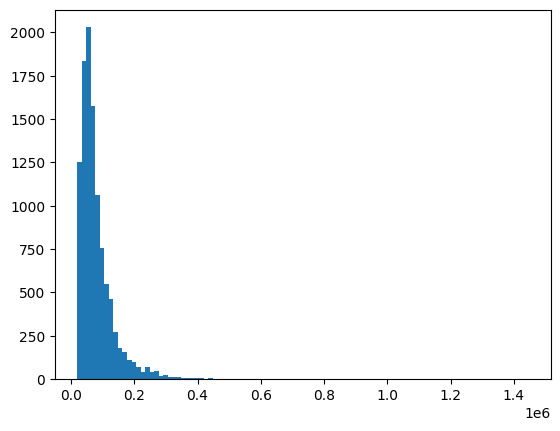

In [18]:
n,bins,patches=plt.hist(samples_concat.jet_pt_lead,bins=100)

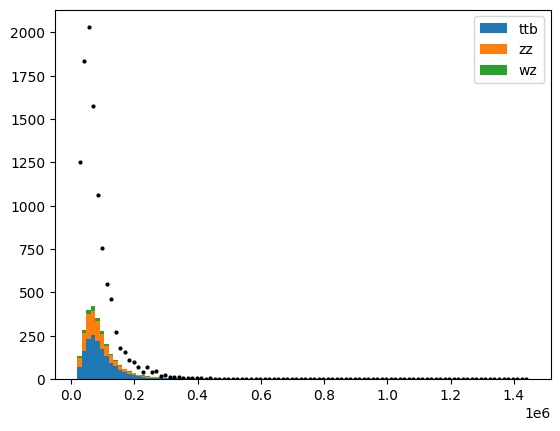

In [20]:
plt.figure()
_ = plt.hist(dats, weights=weights, stacked=True, label=labels, bins=bins)
plt.scatter(bins[:-1]+ 0.5*(bins[1:] - bins[:-1]), n, marker='o', c='black', s=4, alpha=1)
plt.legend()
plt.show()

In [21]:
data = read.read_data_samples(N=N_total)

2024-05-21 16:33:04 [reader.py:read_data_samples] 10732 data samples read
